<a href="https://colab.research.google.com/github/sumukhbhat12/Machine-Learning-Course-FreeCodeCamp/blob/main/Magic_Gamma_Telescope_dataset_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

The dataset used is magic gamma telescope dataset
https://archive.ics.uci.edu/dataset/159/magic+gamma+telescope

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler
from sklearn.metrics import classification_report

In [2]:
col_names = ['fLength', 'fWidth', 'fSize', 'fConc', 'fConc1', 'fAsym', 'fM3Long', 'fM3Trans', 'fAlpha', 'fDist', 'class']
dataset = pd.read_csv('magic04.data', names = col_names)

In [3]:
dataset

,fLength,fWidth,fSize,fConc,fConc1,fAsym,fM3Long,fM3Trans,fAlpha,fDist,class
0,28.7967,16.0021,2.6449,0.3918,0.1982,27.7004,22.0110,-8.2027,40.0920,81.8828,g
1,31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.2610,g
2,162.0520,136.0310,4.0612,0.0374,0.0187,116.7410,-64.8580,-45.2160,76.9600,256.7880,g
3,23.8172,9.5728,2.3385,0.6147,0.3922,27.2107,-6.4633,-7.1513,10.4490,116.7370,g
4,75.1362,30.9205,3.1611,0.3168,0.1832,-5.5277,28.5525,21.8393,4.6480,356.4620,g
...,...,...,...,...,...,...,...,...,...,...,...
19015,21.3846,10.9170,2.6161,0.5857,0.3934,15.2618,11.5245,2.8766,2.4229,106.8258,h
19016,28.9452,6.7020,2.2672,0.5351,0.2784,37.0816,13.1853,-2.9632,86.7975,247.4560,h
19017,75.4455,47.5305,3.4483,0.1417,0.0549,-9.3561,41.0562,-9.4662,30.2987,256.5166,h
19018,120.5135,76.9018,3.9939,0.0944,0.0683,5.8043,-93.5224,-63.8389,84.6874,408.3166,h


converting the class = {g, h} into {1, 0} respectively

In [4]:
dataset['class'] = (dataset['class'] == 'g').astype(int)

In [5]:
dataset.head(10)

,fLength,fWidth,fSize,fConc,fConc1,fAsym,fM3Long,fM3Trans,fAlpha,fDist,class
0,28.7967,16.0021,2.6449,0.3918,0.1982,27.7004,22.0110,-8.2027,40.0920,81.8828,1
1,31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.2610,1
2,162.0520,136.0310,4.0612,0.0374,0.0187,116.7410,-64.8580,-45.2160,76.9600,256.7880,1
3,23.8172,9.5728,2.3385,0.6147,0.3922,27.2107,-6.4633,-7.1513,10.4490,116.7370,1
4,75.1362,30.9205,3.1611,0.3168,0.1832,-5.5277,28.5525,21.8393,4.6480,356.4620,1
5,51.6240,21.1502,2.9085,0.2420,0.1340,50.8761,43.1887,9.8145,3.6130,238.0980,1
6,48.2468,17.3565,3.0332,0.2529,0.1515,8.5730,38.0957,10.5868,4.7920,219.0870,1
7,26.7897,13.7595,2.5521,0.4236,0.2174,29.6339,20.4560,-2.9292,0.8120,237.1340,1
8,96.2327,46.5165,4.1540,0.0779,0.0390,110.3550,85.0486,43.1844,4.8540,248.2260,1
9,46.7619,15.1993,2.5786,0.3377,0.1913,24.7548,43.8771,-6.6812,7.8750,102.2510,1


for class == 1, get all the values of all the columns other than the class column, and draw a histogram

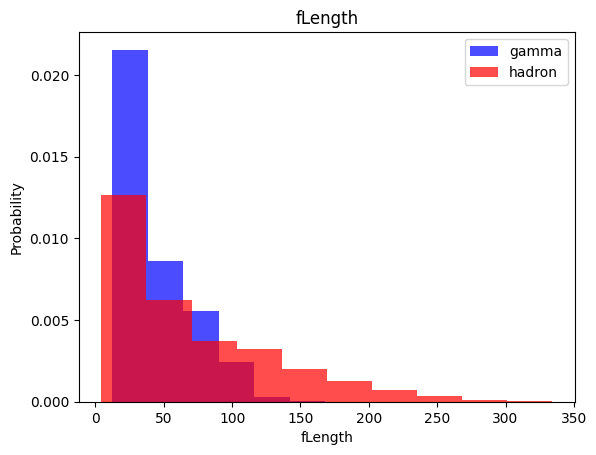

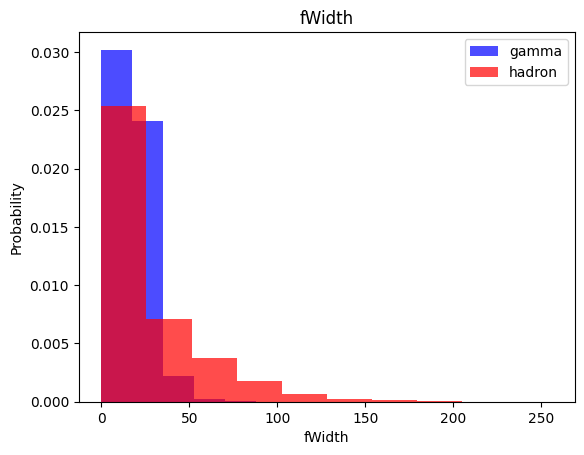

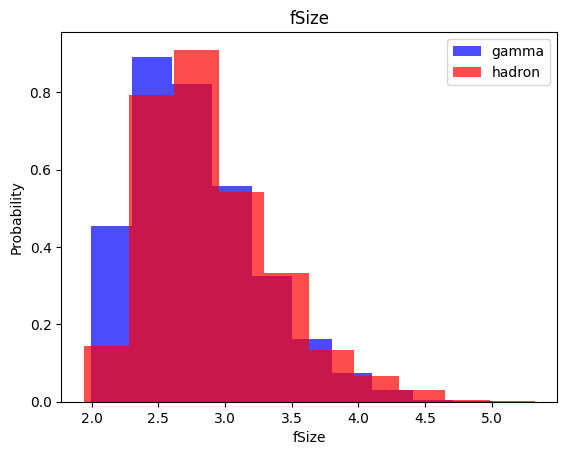

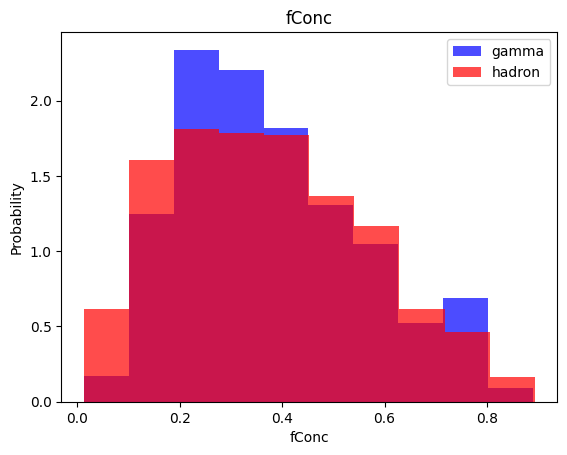

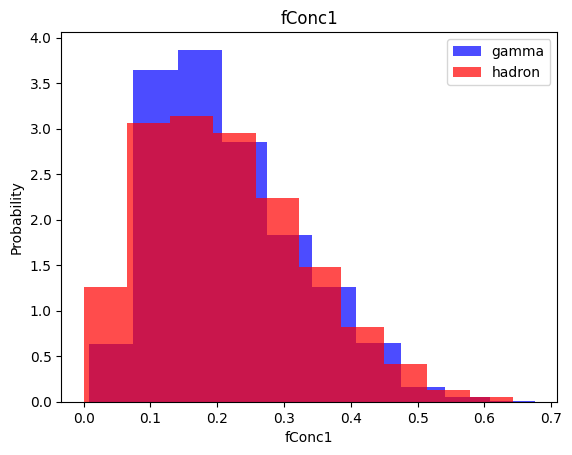

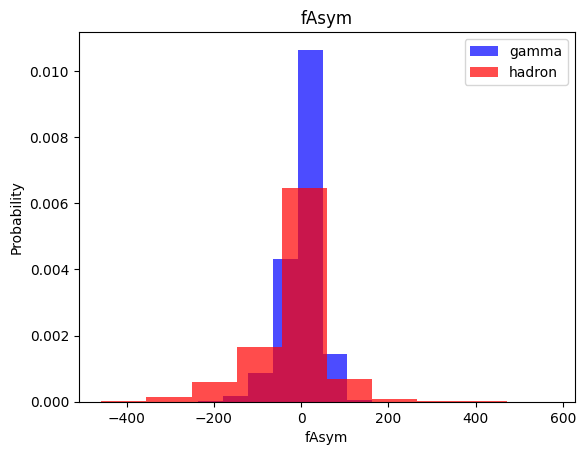

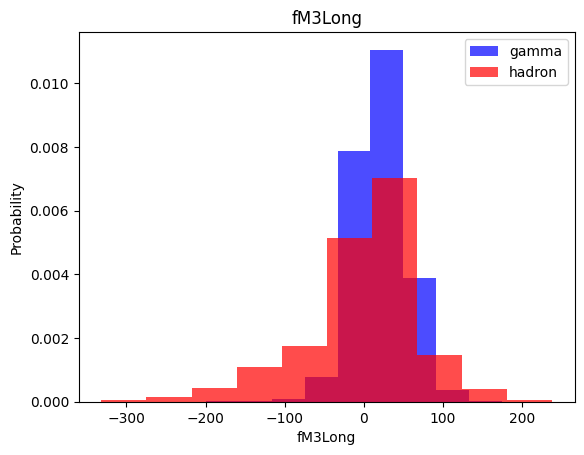

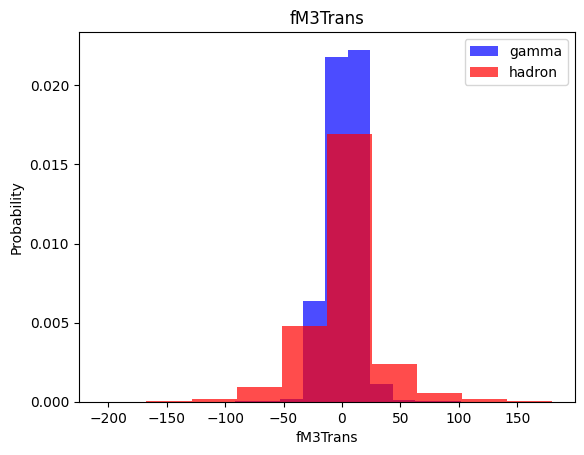

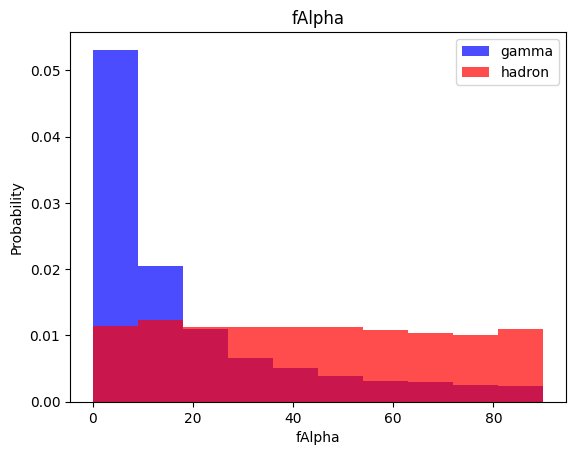

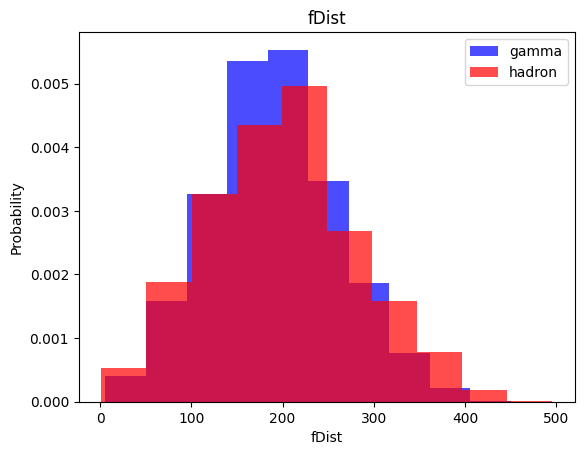

In [5]:
for label in col_names[:-1]:
  plt.hist(dataset[dataset['class'] == 1][label], color='blue', label='gamma', alpha=0.7, density=True)
  plt.hist(dataset[dataset['class'] == 0][label], color='red', label='hadron', alpha=0.7, density=True)
  plt.title(label)
  plt.ylabel('Probability')
  plt.xlabel(label)
  plt.legend()
  plt.show()

#Train, Validation, Test Datasets

In [6]:
# np.split splits the dataset into [point1, point2] where point1 and point2 are the breakpoints in the split
train, valid, test = np.split(dataset.sample(frac=1), [int(0.6*len(dataset)), int(0.8*len(dataset))])

In [7]:
print(len(dataset[dataset['class'] == 1])) # gamma
print(len(dataset[dataset['class'] == 0])) # hadron

12332
6688


since we have less number of hadron in the dataset, we need to increase its number by oversampling

In [8]:
def scale_dataset(dataframe, oversample=False):
  X = dataframe[dataframe.columns[:-1]].values
  y = dataframe[dataframe.columns[-1]].values

  scaler = StandardScaler()
  X = scaler.fit_transform(X)

  if oversample:
    ros = RandomOverSampler()
    X,y = ros.fit_resample(X,y)

  #np.reshape(y,(-1,1)) same as np.reshape(y, (len(y), 1)) we reshape array y because X is 2D and hstack requires both the arrays to be in the same dimension
  data = np.hstack((X,np.reshape(y, (-1, 1))))

  return data, X, y

In [9]:
train, X_train, y_train = scale_dataset(train, oversample=True)

valid, X_valid, y_valid = scale_dataset(valid, oversample=False)

test, X_test, y_test = scale_dataset(test, oversample=False)

In [10]:
print(len(train), len(valid), len(test))

14840 3804 3804


#K Nearest Neighbours

In [19]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report

In [29]:
knn_model = KNeighborsClassifier(n_neighbors=121)

knn_model.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=121)

In [30]:
y_pred = knn_model.predict(X_test)

In [31]:
y_pred

array([0, 0, 0, ..., 0, 1, 1])

In [32]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.80      0.70      0.75      1314
           1       0.85      0.91      0.88      2490

    accuracy                           0.84      3804
   macro avg       0.83      0.80      0.81      3804
weighted avg       0.83      0.84      0.83      3804



#Naive Bayes

In [33]:
from sklearn.naive_bayes import GaussianNB

In [34]:
nb_model = GaussianNB()
nb_model = nb_model.fit(X_train, y_train)

In [35]:
y_pred = nb_model.predict(X_test)

In [36]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.71      0.41      0.52      1314
           1       0.75      0.91      0.82      2490

    accuracy                           0.74      3804
   macro avg       0.73      0.66      0.67      3804
weighted avg       0.73      0.74      0.72      3804



#Logistic Regression

In [12]:
from sklearn.linear_model import LogisticRegression

In [13]:
lg_model = LogisticRegression()

lg_model = lg_model.fit(X_train,y_train)

In [14]:
y_pred = lg_model.predict(X_test)

In [17]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.69      0.73      0.71      1351
           1       0.85      0.82      0.83      2453

    accuracy                           0.78      3804
   macro avg       0.77      0.77      0.77      3804
weighted avg       0.79      0.78      0.79      3804



#Support Vector Machines

In [18]:
from sklearn.svm import SVC

In [21]:
svm_model = SVC()

svm_model = svm_model.fit(X_train,y_train)

y_pred = svm_model.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.80      0.79      0.80      1351
           1       0.89      0.89      0.89      2453

    accuracy                           0.86      3804
   macro avg       0.85      0.84      0.84      3804
weighted avg       0.86      0.86      0.86      3804



#Neural Network

In [11]:
import tensorflow as tf

In [67]:
def train_model(X_train, y_train, num_nodes, dropout_prob, lr, batch_size, epochs):
  nn_model = tf.keras.Sequential([
      tf.keras.layers.Dense(num_nodes, activation='relu', input_shape=(10,)),
      tf.keras.layers.Dropout(dropout_prob),
      tf.keras.layers.Dense(num_nodes, activation='relu'),
      tf.keras.layers.Dropout(dropout_prob),
      tf.keras.layers.Dense(1, activation='sigmoid')
  ])

  nn_model.compile(optimizer=tf.keras.optimizers.Adam(lr), loss='binary_crossentropy', metrics=['accuracy'])

  return nn_model.fit(
    X_train, y_train, epochs=epochs, batch_size=batch_size, validation_split=0.2, verbose=0
  ), nn_model

val_loss and val_accuracy are validation loss and validation accuracy obtained from the validation split of the training data

In [65]:
def plot_history(history):
  fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,4))
  ax1.plot(history.history['loss'], label='loss')
  ax1.plot(history.history['val_loss'], label='val_loss')
  ax1.set_xlabel('Epoch')
  ax1.set_ylabel('Binary crossentropy')
  ax1.grid(True)

  ax2.plot(history.history['accuracy'], label='accuracy')
  ax2.plot(history.history['val_accuracy'], label='val_accuracy')
  ax2.set_xlabel('Epoch')
  ax2.set_ylabel('Accuracy')
  ax2.grid(True)
  
  plt.show()

0.8 * 14840 = 11872 -> size of the dataset being trained,
11872 / 16 = 742 -> best batch size observed from trial and error,
epoch -> 1000,
learning rate -> 0.001,
final accuracy surpasses 0.94

16 nodes, dropout 0, lr 0.01, batch size 742


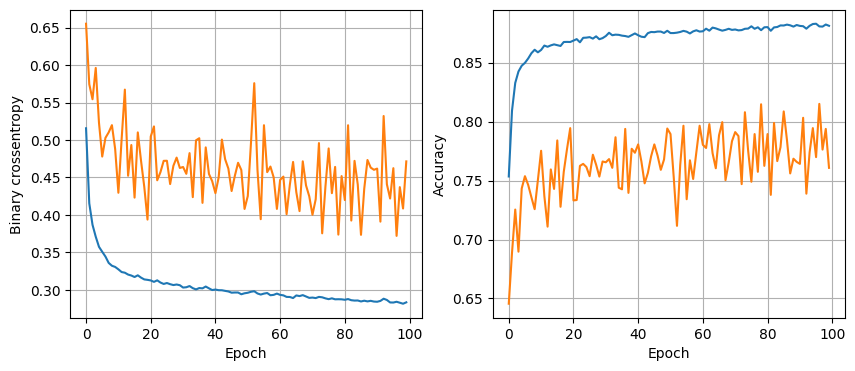

119/119 [==============================] - 0s 1ms/step - loss: 0.3186 - accuracy: 0.8688
16 nodes, dropout 0, lr 0.01, batch size 1484


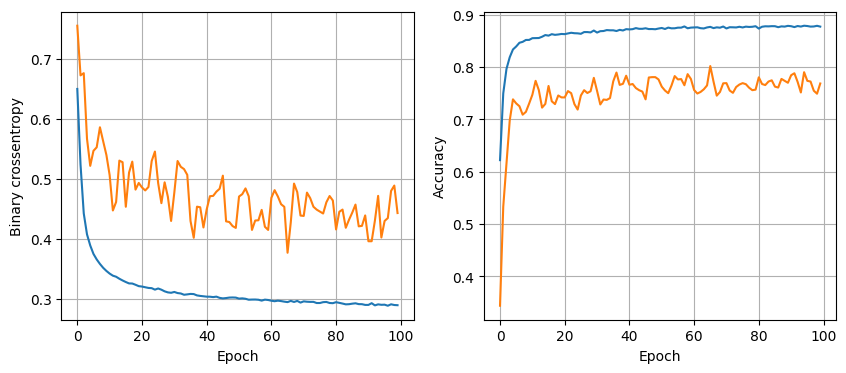

119/119 [==============================] - 0s 1ms/step - loss: 0.3145 - accuracy: 0.8730
16 nodes, dropout 0, lr 0.01, batch size 2968


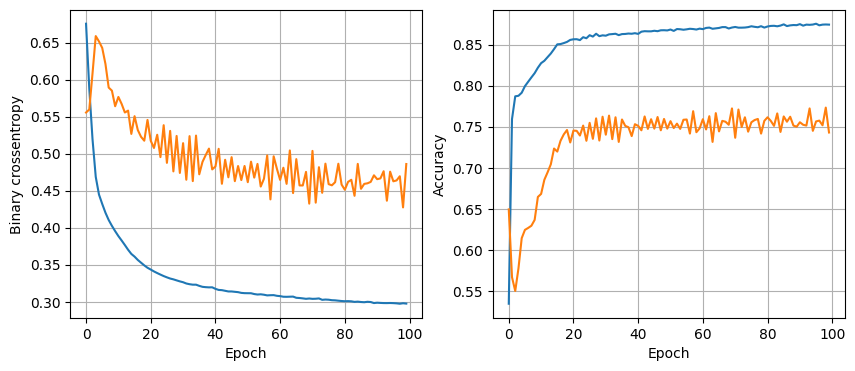

119/119 [==============================] - 0s 1ms/step - loss: 0.3128 - accuracy: 0.8712
16 nodes, dropout 0, lr 0.005, batch size 742


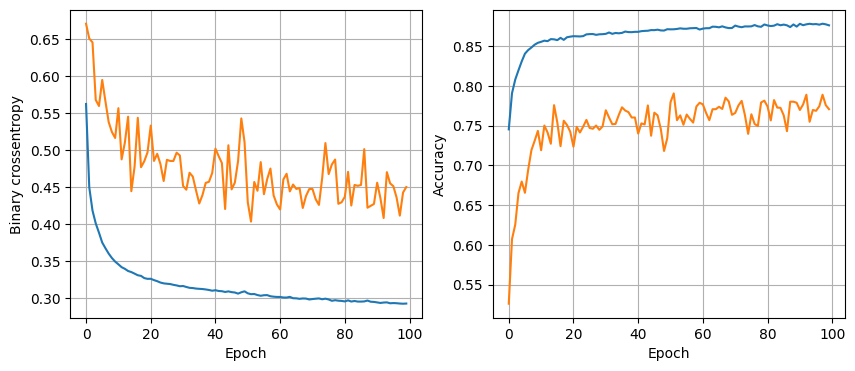

119/119 [==============================] - 0s 1ms/step - loss: 0.3111 - accuracy: 0.8712
16 nodes, dropout 0, lr 0.005, batch size 1484


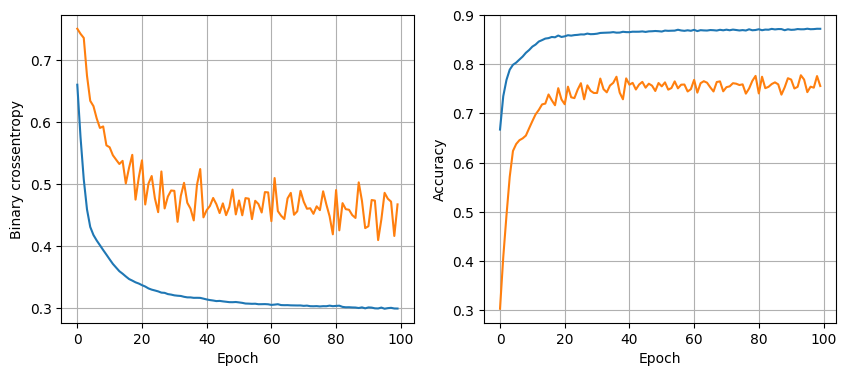

119/119 [==============================] - 0s 2ms/step - loss: 0.3124 - accuracy: 0.8678
16 nodes, dropout 0, lr 0.005, batch size 2968


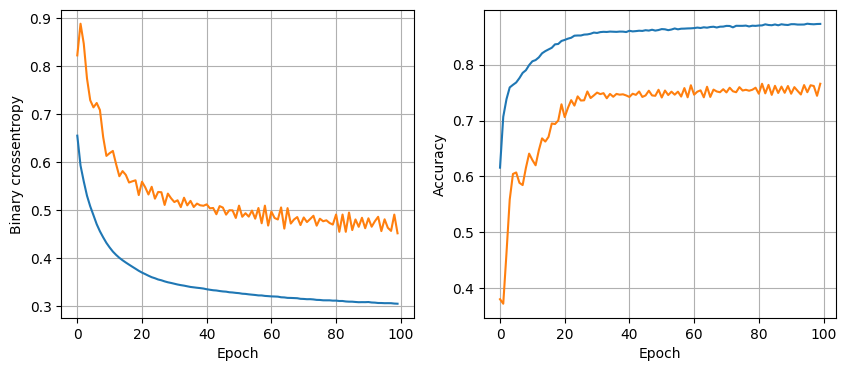

119/119 [==============================] - 0s 1ms/step - loss: 0.3126 - accuracy: 0.8736
16 nodes, dropout 0, lr 0.001, batch size 742


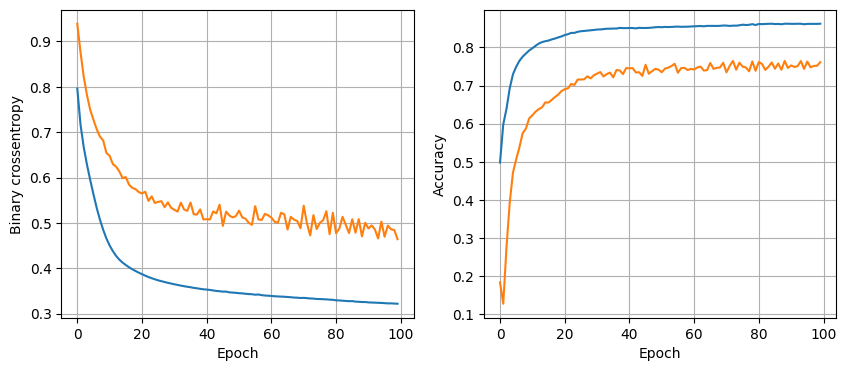

119/119 [==============================] - 0s 2ms/step - loss: 0.3261 - accuracy: 0.8657
16 nodes, dropout 0, lr 0.001, batch size 1484


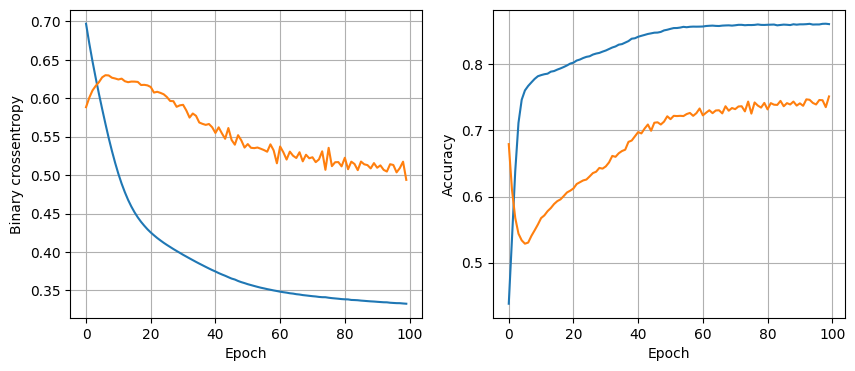

119/119 [==============================] - 0s 1ms/step - loss: 0.3309 - accuracy: 0.8636
16 nodes, dropout 0, lr 0.001, batch size 2968


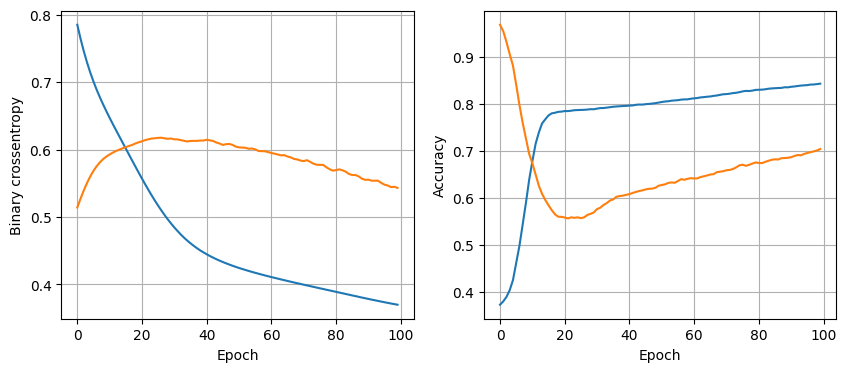

119/119 [==============================] - 0s 1ms/step - loss: 0.3610 - accuracy: 0.8433
16 nodes, dropout 0.2, lr 0.01, batch size 742


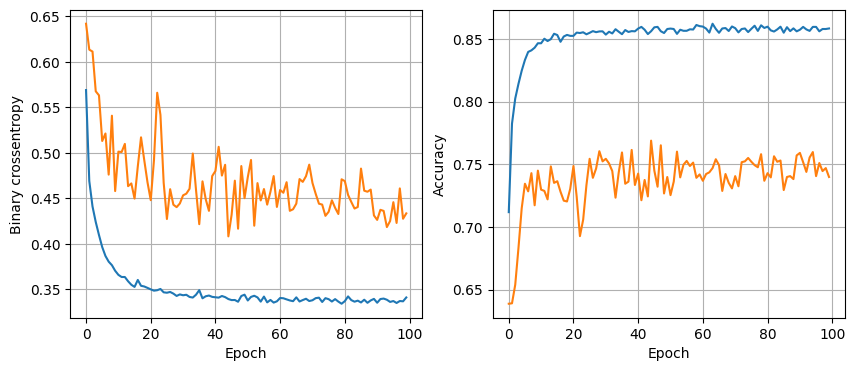

119/119 [==============================] - 0s 1ms/step - loss: 0.3210 - accuracy: 0.8712
16 nodes, dropout 0.2, lr 0.01, batch size 1484


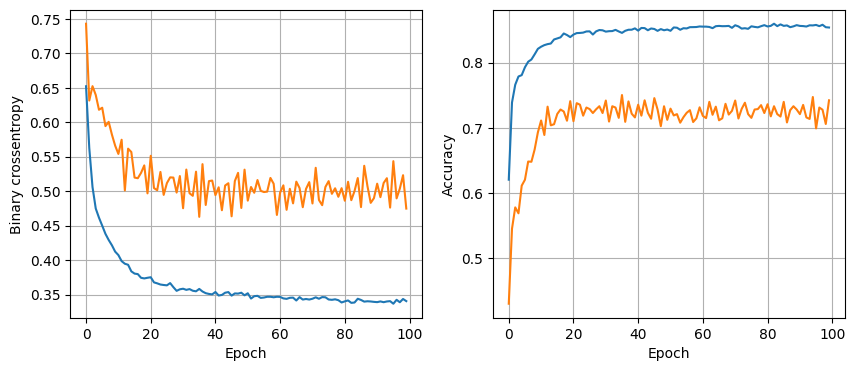

119/119 [==============================] - 0s 1ms/step - loss: 0.3136 - accuracy: 0.8680
16 nodes, dropout 0.2, lr 0.01, batch size 2968


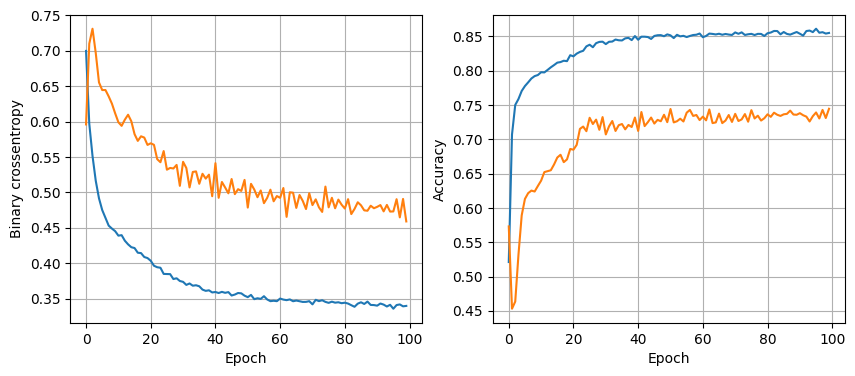

119/119 [==============================] - 0s 1ms/step - loss: 0.3150 - accuracy: 0.8670
16 nodes, dropout 0.2, lr 0.005, batch size 742


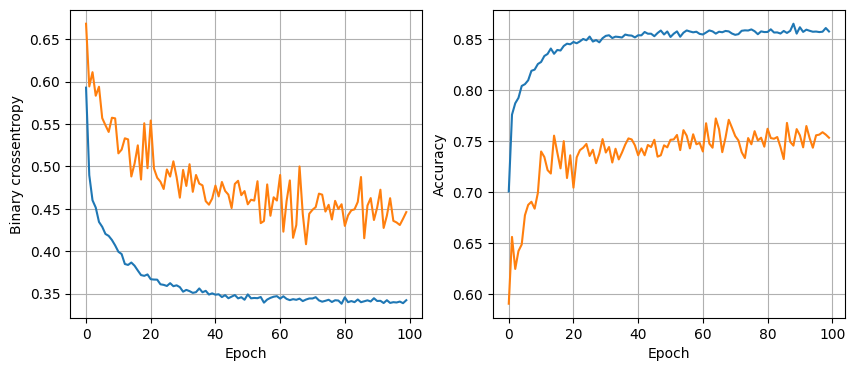

119/119 [==============================] - 0s 1ms/step - loss: 0.3162 - accuracy: 0.8693
16 nodes, dropout 0.2, lr 0.005, batch size 1484


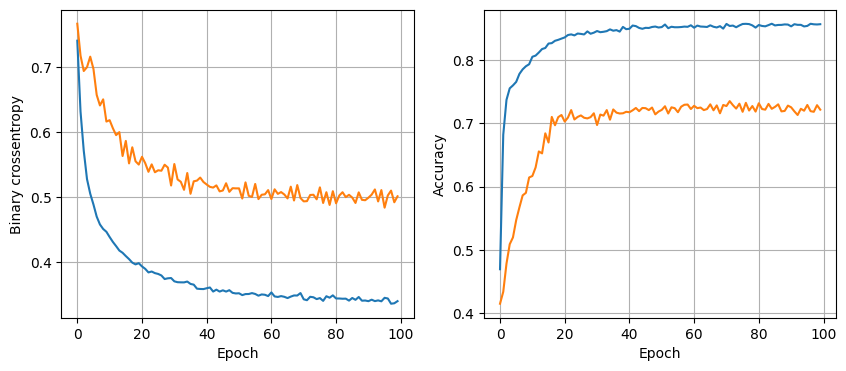

119/119 [==============================] - 0s 1ms/step - loss: 0.3159 - accuracy: 0.8670
16 nodes, dropout 0.2, lr 0.005, batch size 2968


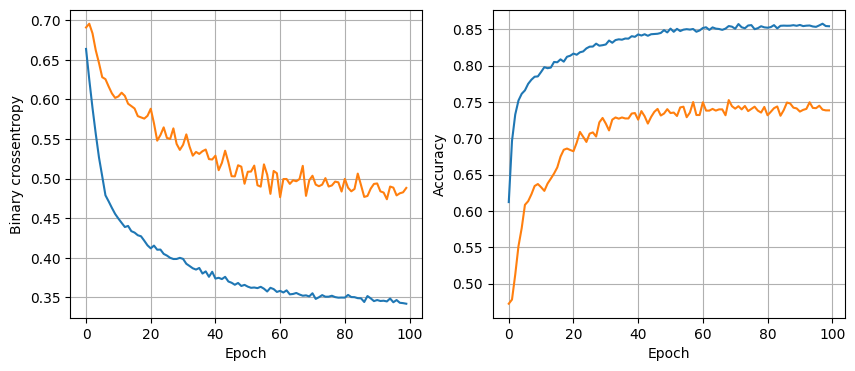

119/119 [==============================] - 0s 2ms/step - loss: 0.3169 - accuracy: 0.8662
16 nodes, dropout 0.2, lr 0.001, batch size 742


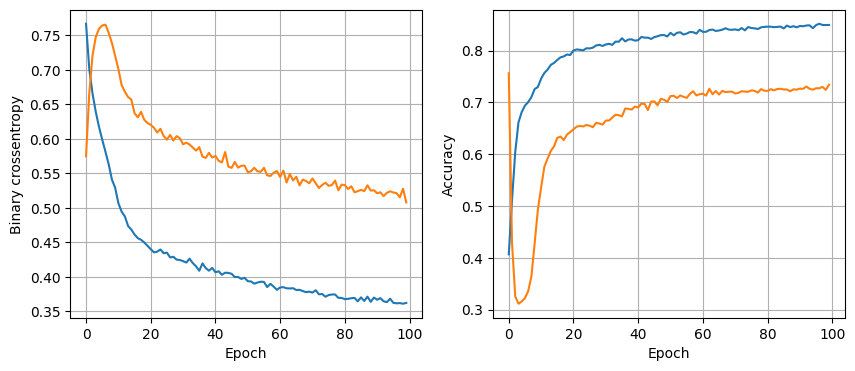

119/119 [==============================] - 0s 1ms/step - loss: 0.3254 - accuracy: 0.8625
16 nodes, dropout 0.2, lr 0.001, batch size 1484


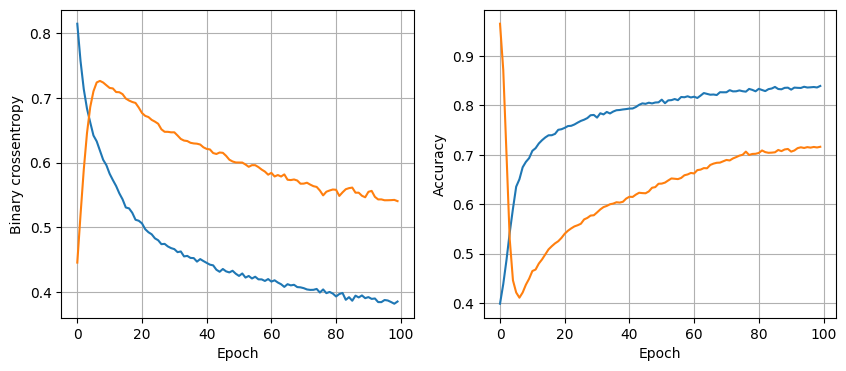

119/119 [==============================] - 0s 1ms/step - loss: 0.3419 - accuracy: 0.8599
16 nodes, dropout 0.2, lr 0.001, batch size 2968


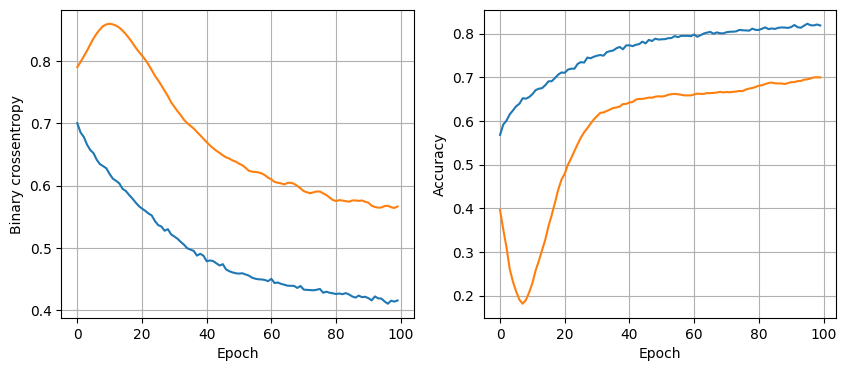

119/119 [==============================] - 0s 1ms/step - loss: 0.3655 - accuracy: 0.8473
32 nodes, dropout 0, lr 0.01, batch size 742


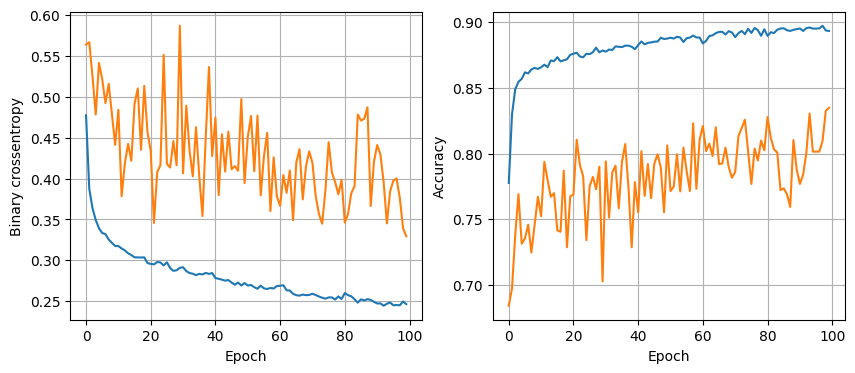

119/119 [==============================] - 0s 1ms/step - loss: 0.3543 - accuracy: 0.8559
32 nodes, dropout 0, lr 0.01, batch size 1484


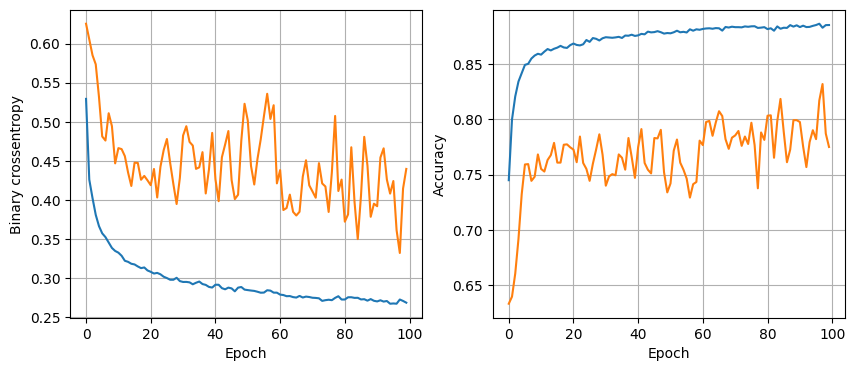

119/119 [==============================] - 0s 1ms/step - loss: 0.3290 - accuracy: 0.8696
32 nodes, dropout 0, lr 0.01, batch size 2968


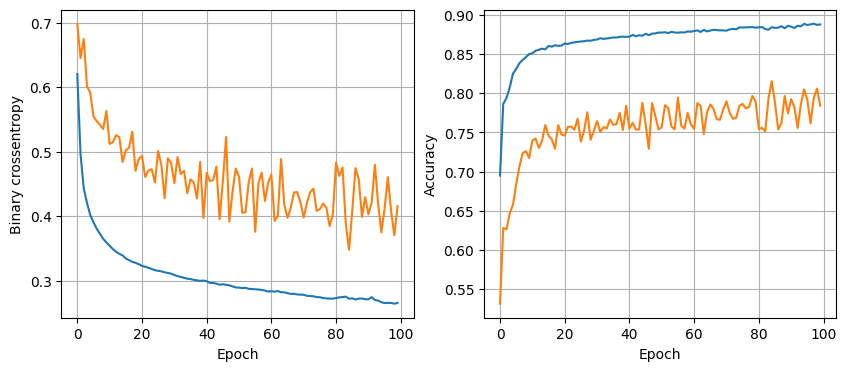

119/119 [==============================] - 0s 1ms/step - loss: 0.3121 - accuracy: 0.8754
32 nodes, dropout 0, lr 0.005, batch size 742


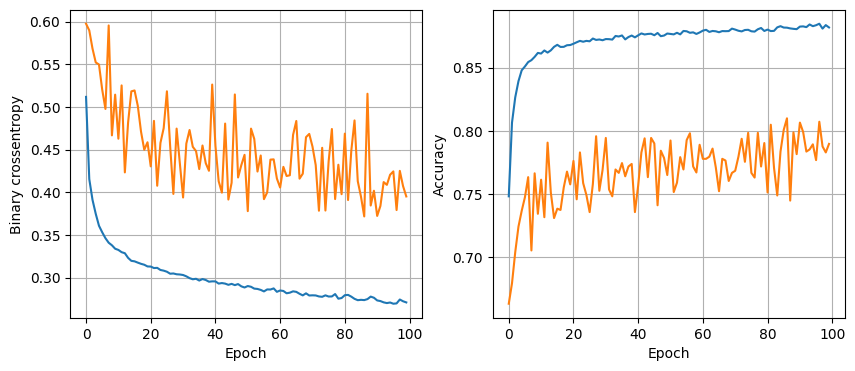

119/119 [==============================] - 0s 1ms/step - loss: 0.3206 - accuracy: 0.8646
32 nodes, dropout 0, lr 0.005, batch size 1484


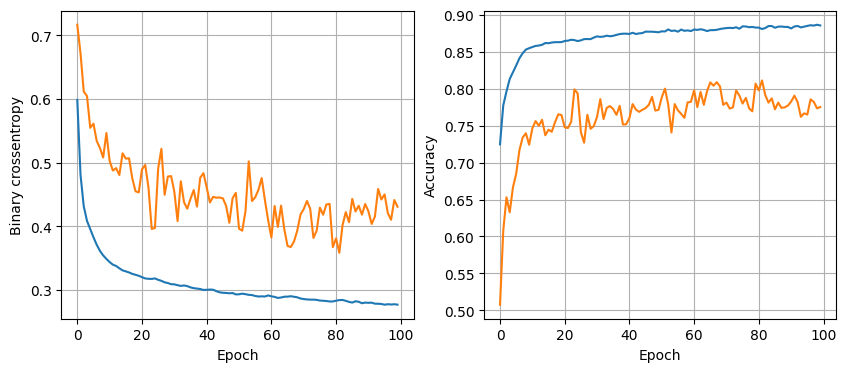

119/119 [==============================] - 0s 1ms/step - loss: 0.3158 - accuracy: 0.8683
32 nodes, dropout 0, lr 0.005, batch size 2968


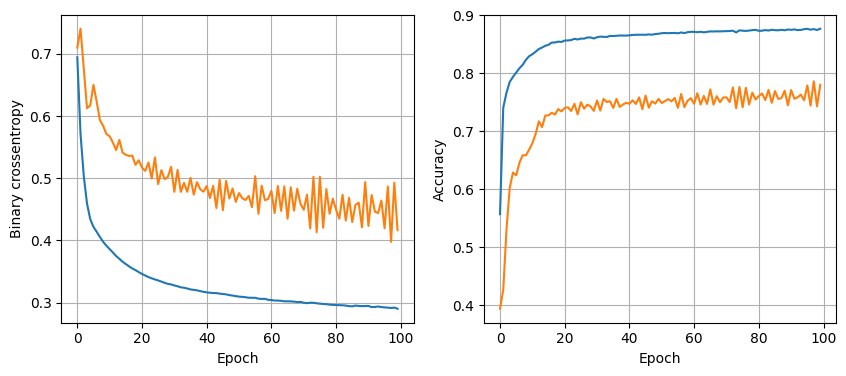

119/119 [==============================] - 0s 1ms/step - loss: 0.3120 - accuracy: 0.8709
32 nodes, dropout 0, lr 0.001, batch size 742


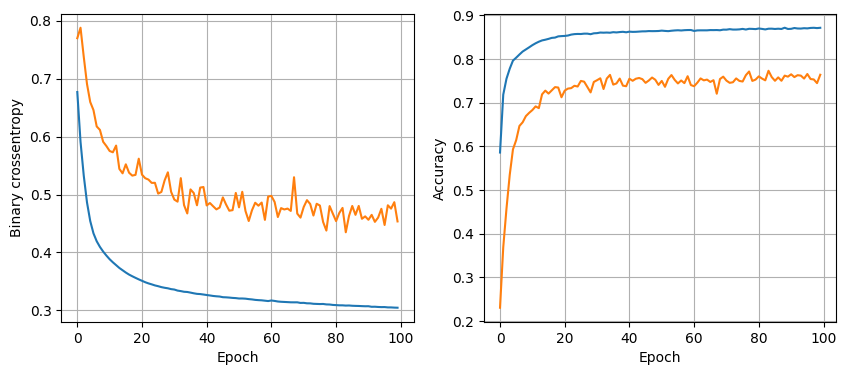

119/119 [==============================] - 0s 1ms/step - loss: 0.3140 - accuracy: 0.8704
32 nodes, dropout 0, lr 0.001, batch size 1484


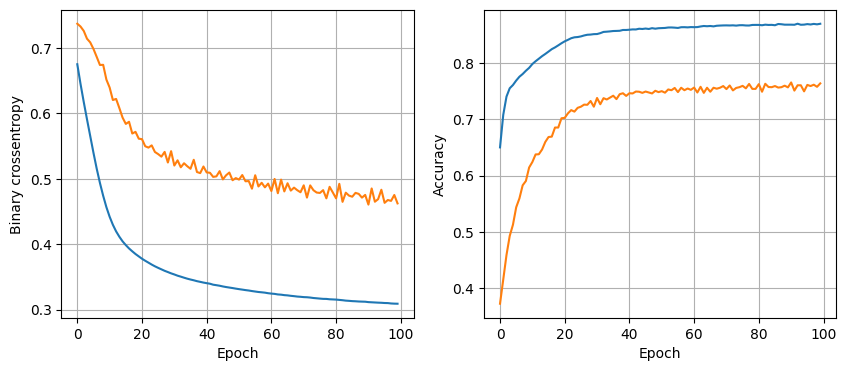

119/119 [==============================] - 0s 1ms/step - loss: 0.3124 - accuracy: 0.8659
32 nodes, dropout 0, lr 0.001, batch size 2968


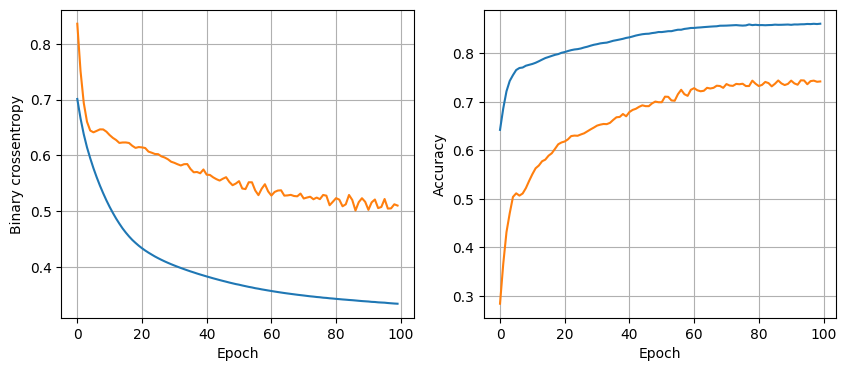

119/119 [==============================] - 0s 1ms/step - loss: 0.3306 - accuracy: 0.8636
32 nodes, dropout 0.2, lr 0.01, batch size 742


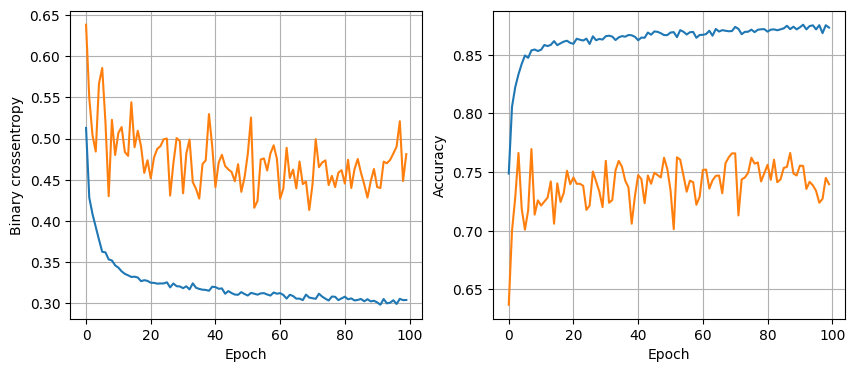

119/119 [==============================] - 0s 1ms/step - loss: 0.2995 - accuracy: 0.8728
32 nodes, dropout 0.2, lr 0.01, batch size 1484


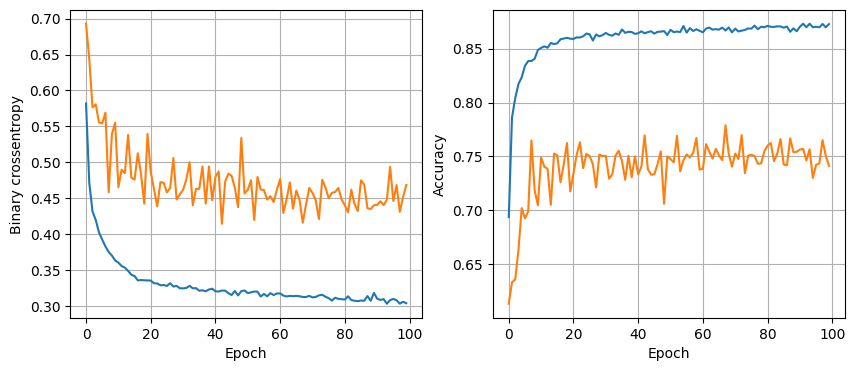

119/119 [==============================] - 0s 1ms/step - loss: 0.3043 - accuracy: 0.8717
32 nodes, dropout 0.2, lr 0.01, batch size 2968


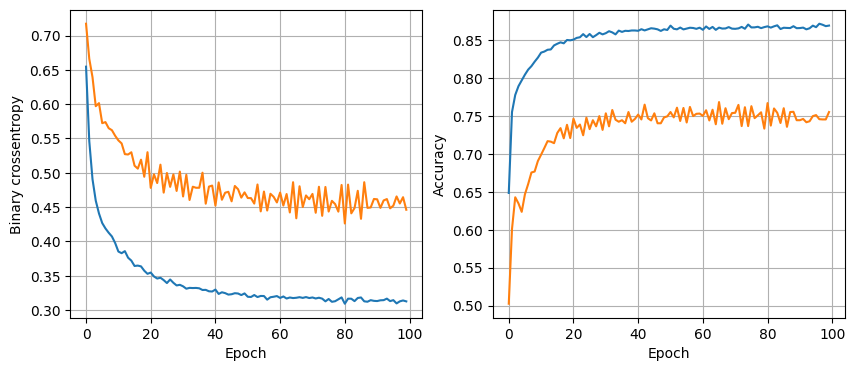

119/119 [==============================] - 0s 1ms/step - loss: 0.3060 - accuracy: 0.8746
32 nodes, dropout 0.2, lr 0.005, batch size 742


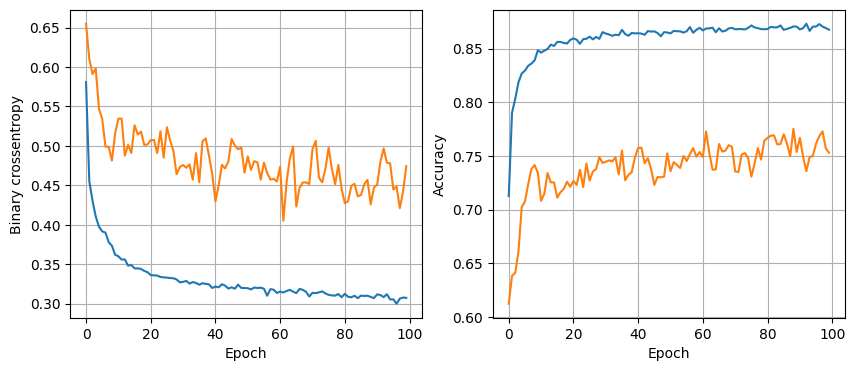

119/119 [==============================] - 0s 1ms/step - loss: 0.2984 - accuracy: 0.8757
32 nodes, dropout 0.2, lr 0.005, batch size 1484


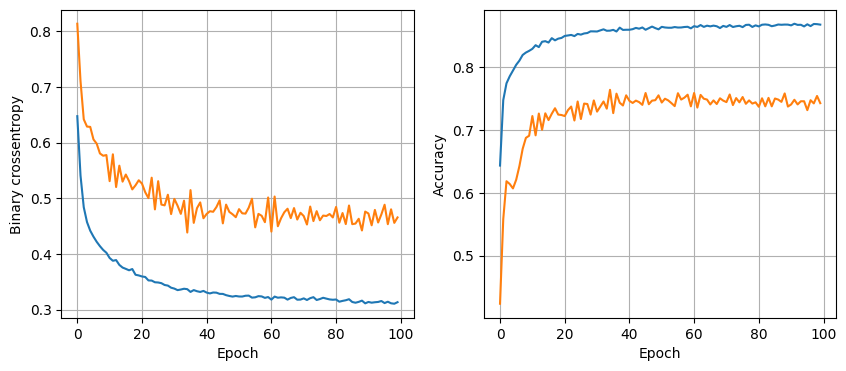

119/119 [==============================] - 0s 1ms/step - loss: 0.3038 - accuracy: 0.8730
32 nodes, dropout 0.2, lr 0.005, batch size 2968


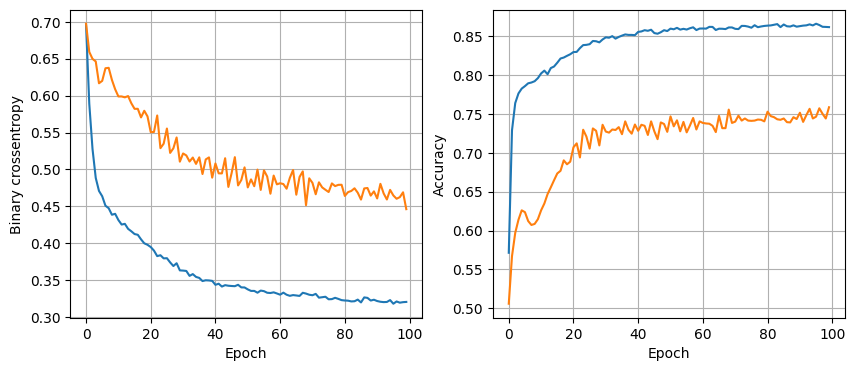

119/119 [==============================] - 0s 1ms/step - loss: 0.3090 - accuracy: 0.8730
32 nodes, dropout 0.2, lr 0.001, batch size 742


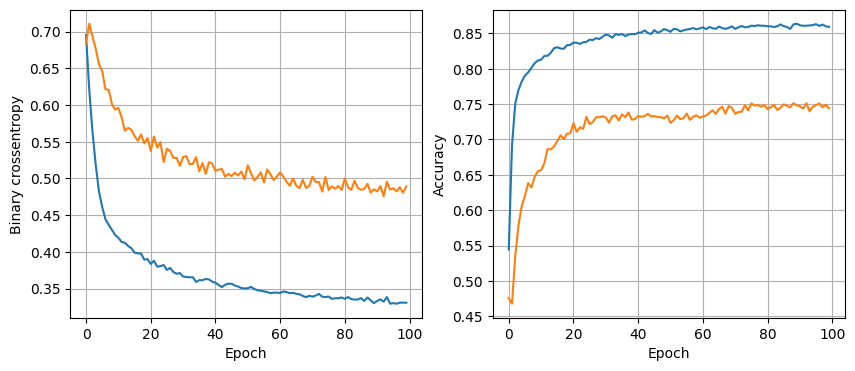

119/119 [==============================] - 0s 1ms/step - loss: 0.3110 - accuracy: 0.8686
32 nodes, dropout 0.2, lr 0.001, batch size 1484


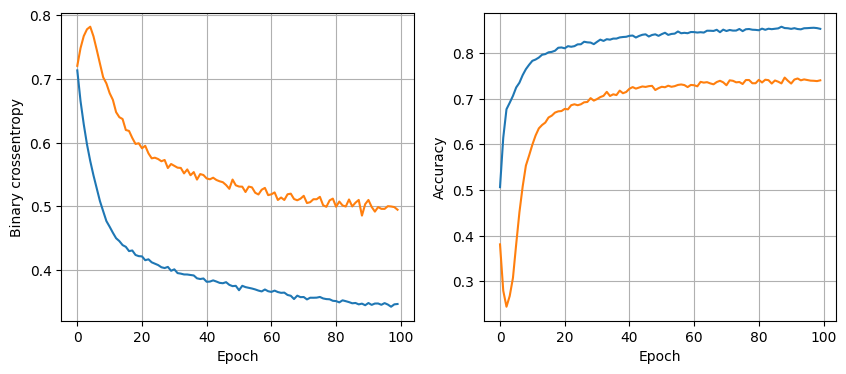

119/119 [==============================] - 0s 1ms/step - loss: 0.3185 - accuracy: 0.8641
32 nodes, dropout 0.2, lr 0.001, batch size 2968


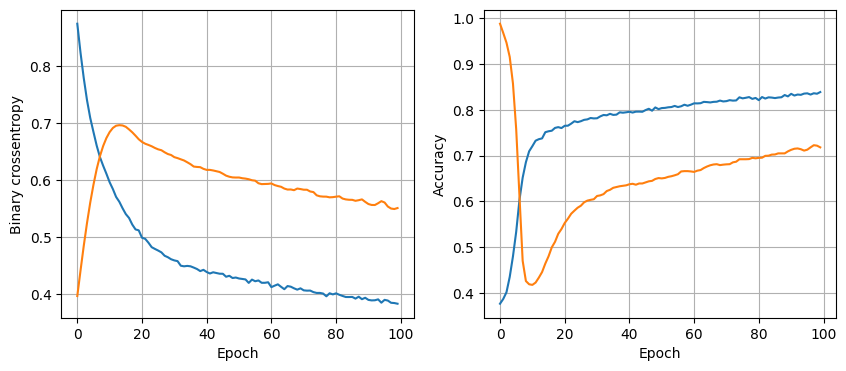

119/119 [==============================] - 0s 1ms/step - loss: 0.3484 - accuracy: 0.8509
64 nodes, dropout 0, lr 0.01, batch size 742


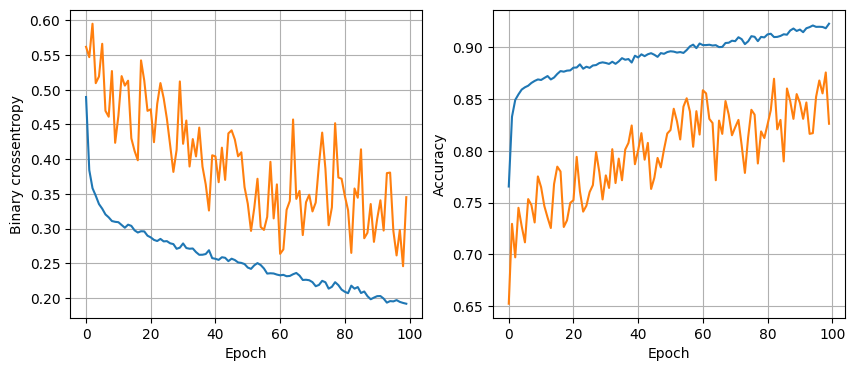

119/119 [==============================] - 0s 1ms/step - loss: 0.3828 - accuracy: 0.8736
64 nodes, dropout 0, lr 0.01, batch size 1484


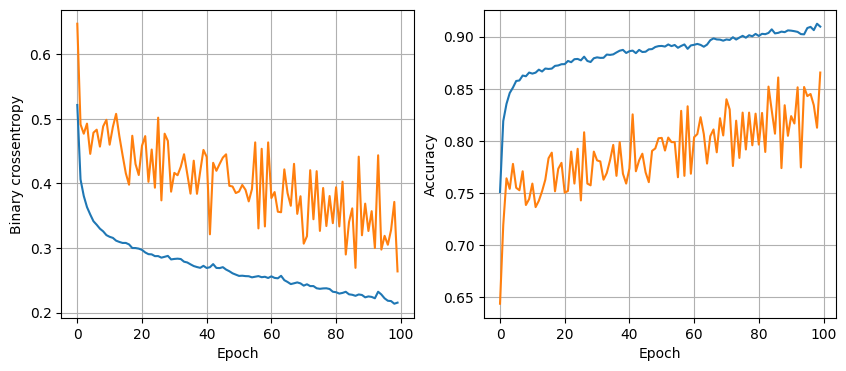

119/119 [==============================] - 0s 1ms/step - loss: 0.3588 - accuracy: 0.8596
64 nodes, dropout 0, lr 0.01, batch size 2968


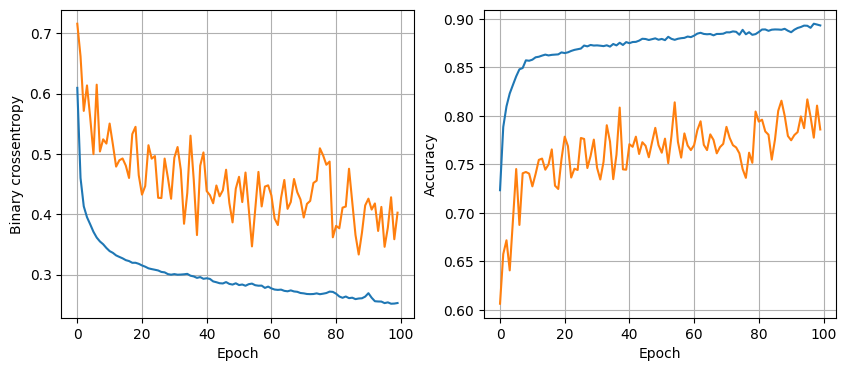

119/119 [==============================] - 0s 1ms/step - loss: 0.3135 - accuracy: 0.8709
64 nodes, dropout 0, lr 0.005, batch size 742


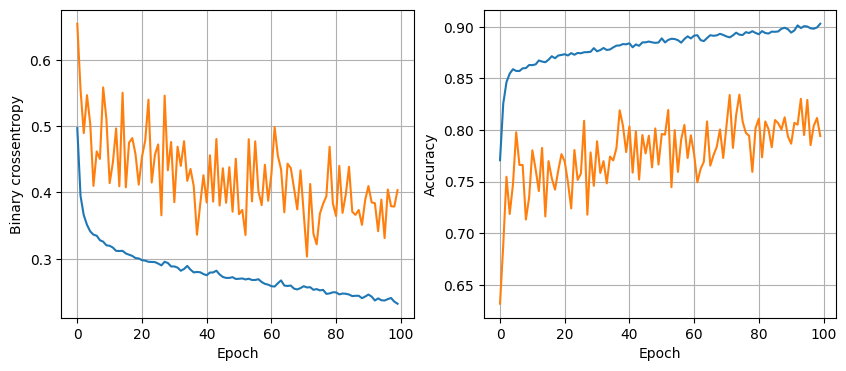

119/119 [==============================] - 0s 1ms/step - loss: 0.3349 - accuracy: 0.8654
64 nodes, dropout 0, lr 0.005, batch size 1484


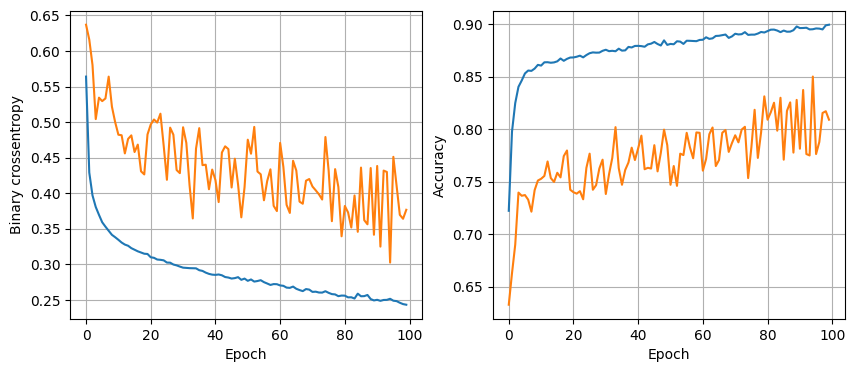

119/119 [==============================] - 0s 1ms/step - loss: 0.3273 - accuracy: 0.8659
64 nodes, dropout 0, lr 0.005, batch size 2968


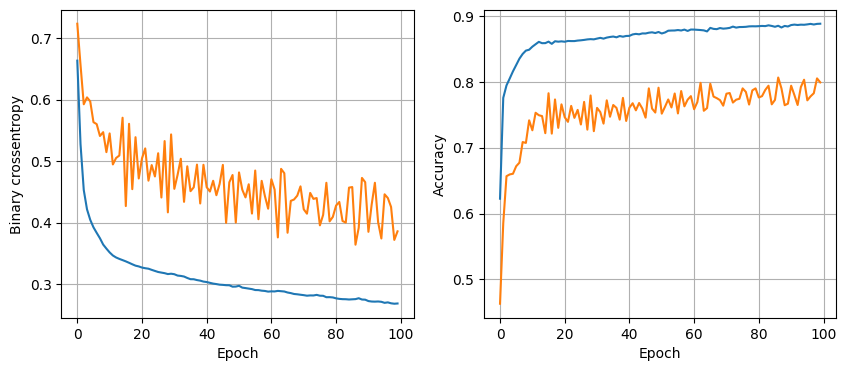

119/119 [==============================] - 0s 1ms/step - loss: 0.3136 - accuracy: 0.8701
64 nodes, dropout 0, lr 0.001, batch size 742


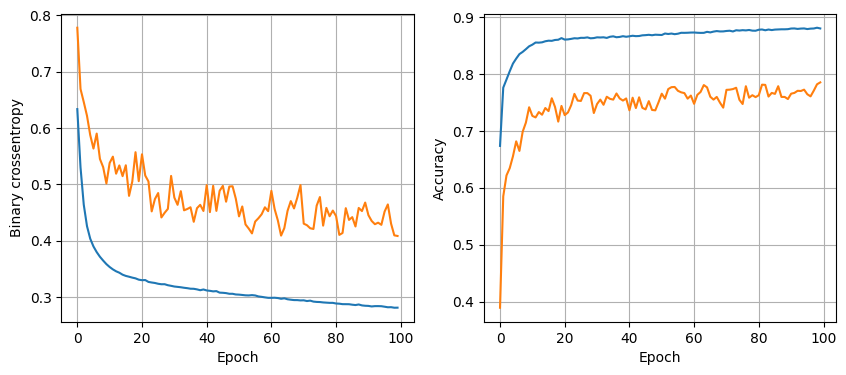

119/119 [==============================] - 0s 1ms/step - loss: 0.3102 - accuracy: 0.8730
64 nodes, dropout 0, lr 0.001, batch size 1484


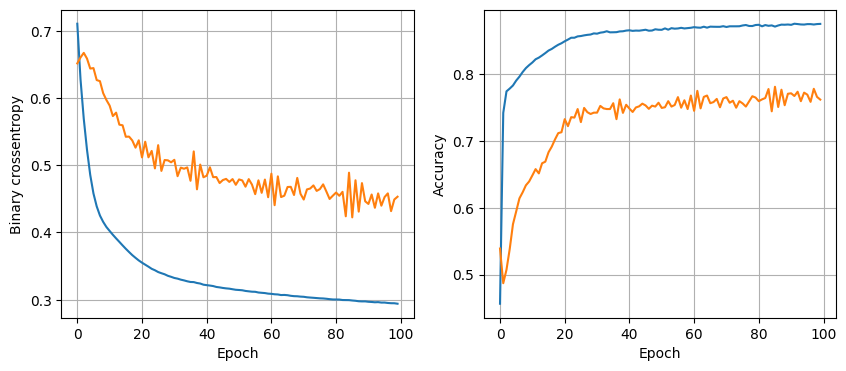

119/119 [==============================] - 0s 1ms/step - loss: 0.3090 - accuracy: 0.8736
64 nodes, dropout 0, lr 0.001, batch size 2968


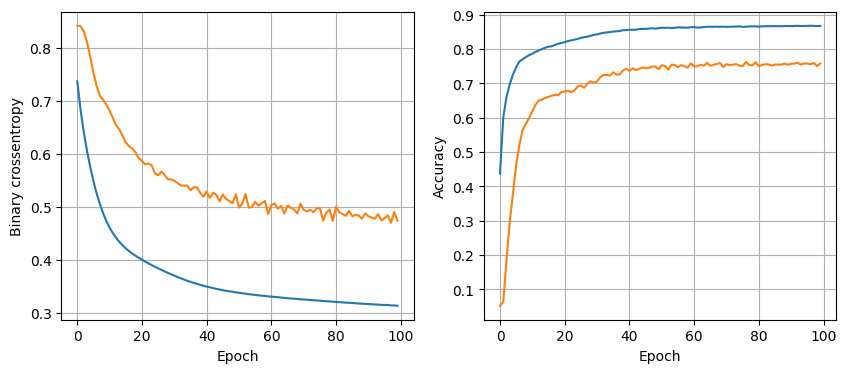

119/119 [==============================] - 0s 2ms/step - loss: 0.3172 - accuracy: 0.8672
64 nodes, dropout 0.2, lr 0.01, batch size 742


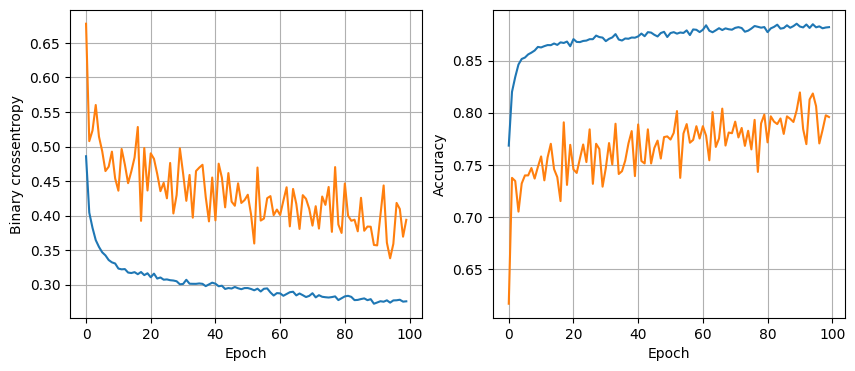

119/119 [==============================] - 0s 2ms/step - loss: 0.3010 - accuracy: 0.8709
64 nodes, dropout 0.2, lr 0.01, batch size 1484


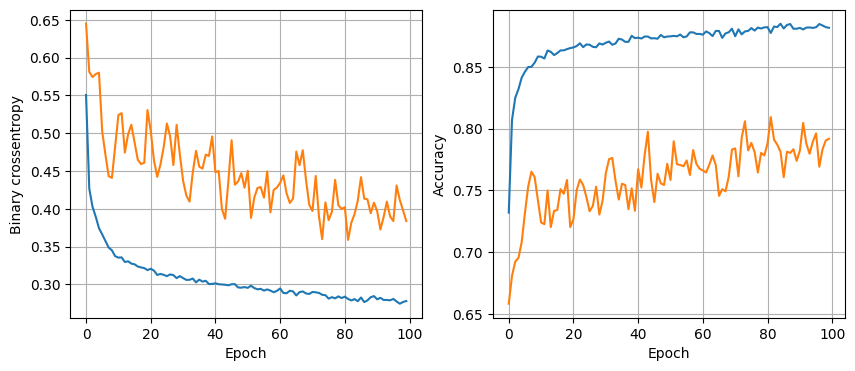

119/119 [==============================] - 0s 2ms/step - loss: 0.2998 - accuracy: 0.8743
64 nodes, dropout 0.2, lr 0.01, batch size 2968


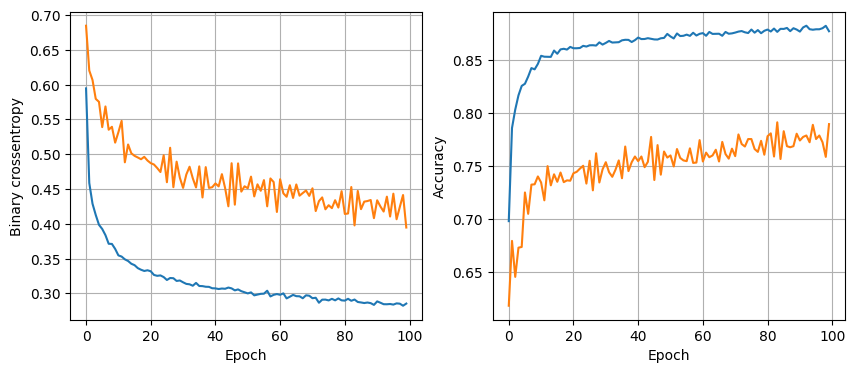

119/119 [==============================] - 0s 2ms/step - loss: 0.2966 - accuracy: 0.8772
64 nodes, dropout 0.2, lr 0.005, batch size 742


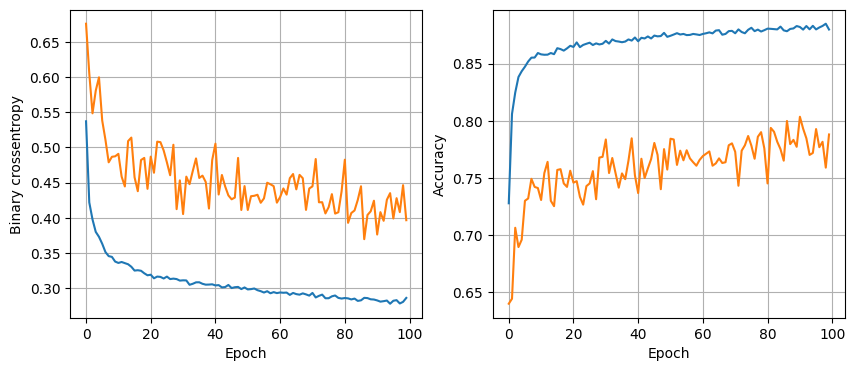

119/119 [==============================] - 0s 2ms/step - loss: 0.2942 - accuracy: 0.8775
64 nodes, dropout 0.2, lr 0.005, batch size 1484


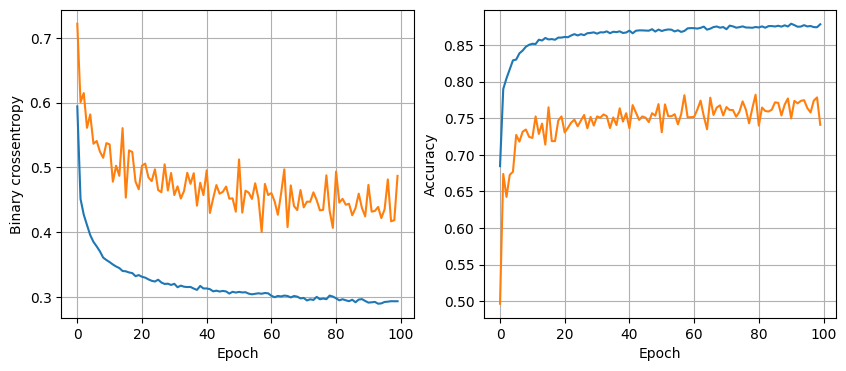

119/119 [==============================] - 0s 2ms/step - loss: 0.3031 - accuracy: 0.8707
64 nodes, dropout 0.2, lr 0.005, batch size 2968


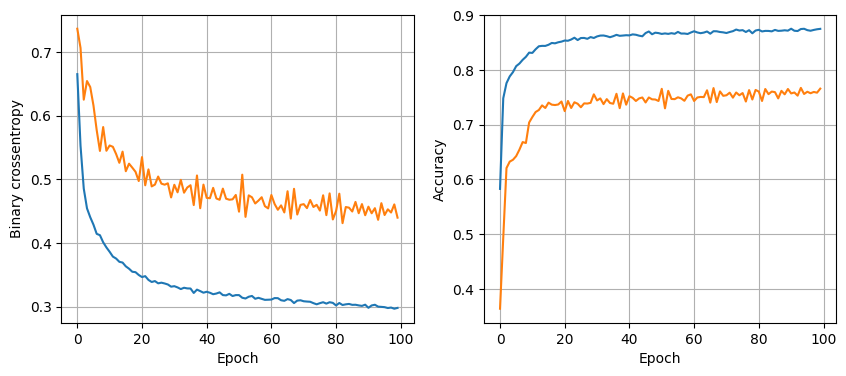

119/119 [==============================] - 0s 2ms/step - loss: 0.2998 - accuracy: 0.8728
64 nodes, dropout 0.2, lr 0.001, batch size 742


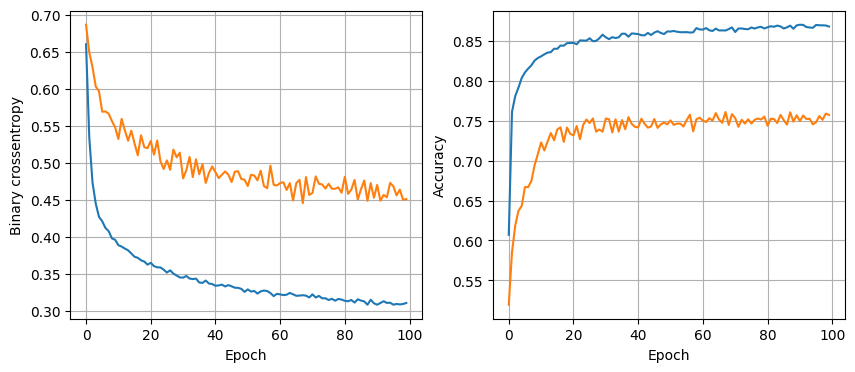

119/119 [==============================] - 0s 1ms/step - loss: 0.3046 - accuracy: 0.8722
64 nodes, dropout 0.2, lr 0.001, batch size 1484


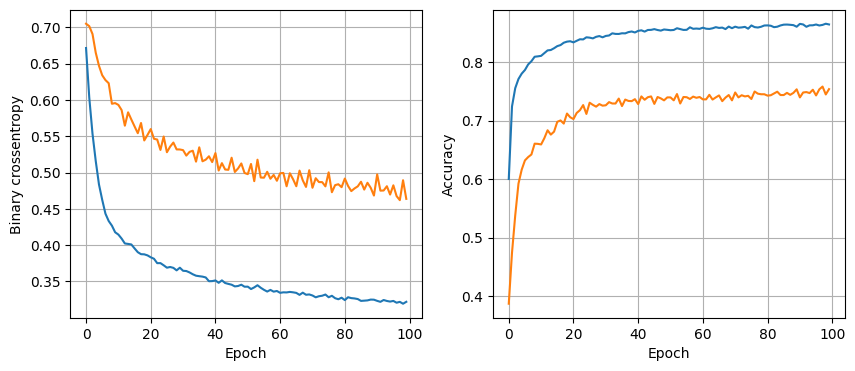

119/119 [==============================] - 0s 2ms/step - loss: 0.3113 - accuracy: 0.8693
64 nodes, dropout 0.2, lr 0.001, batch size 2968


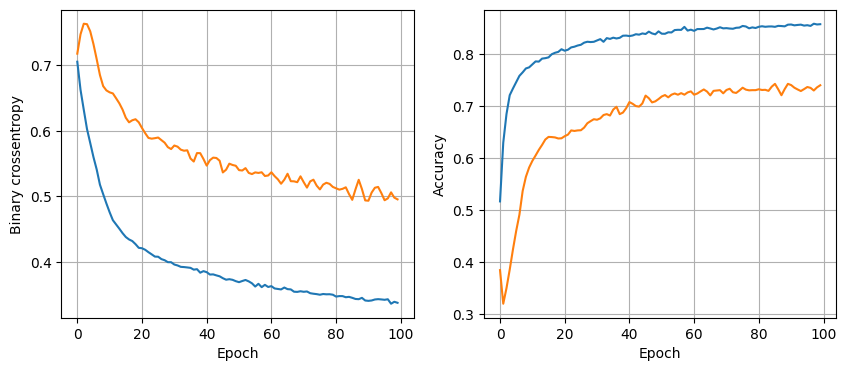

119/119 [==============================] - 0s 1ms/step - loss: 0.3191 - accuracy: 0.8675


In [77]:
# history,_ = train_model(X_train, y_train, 32, 0, 0.001, 742, 200)

epochs = 100
least_val_loss = float('inf')
least_loss_model = None

for num_nodes in [16, 32, 64]:
  for dropout_prob in [0, 0.2]:
    for lr in [0.01, 0.005, 0.001]:
      for batch_size in [742, 1484, 2968]:
        print(f"{num_nodes} nodes, dropout {dropout_prob}, lr {lr}, batch size {batch_size}")
        history, model = train_model(X_train, y_train, num_nodes, dropout_prob, lr, batch_size, epochs)
        plot_history(history)
        val_loss = model.evaluate(X_valid, y_valid)
        # print(val_loss)
        if val_loss[0] < least_val_loss:
          least_val_loss = val_loss[0]
          least_loss_model = model
        

In [80]:
y_pred = least_loss_model.predict(X_test)

y_pred = (y_pred > 0.5).astype(int).reshape(-1,)

print(y_pred)

119/119 [==============================] - 0s 1ms/step
[0 1 0 ... 1 1 1]


In [81]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.88      0.76      0.82      1378
           1       0.88      0.94      0.91      2426

    accuracy                           0.88      3804
   macro avg       0.88      0.85      0.86      3804
weighted avg       0.88      0.88      0.88      3804

